In [58]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import data_processing
import math
import ipympl
from scipy import stats
from numpy import NaN
from matplotlib.pyplot import box
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib.ticker import FormatStrFormatter


In [2]:
%matplotlib widget

In [16]:
jordyn_performance_wo = np.loadtxt('jordyn_wo.txt')
jordyn_ID_wo = np.loadtxt('jordyn_ID_wo.txt')
jordyn_performance_haptics = np.loadtxt('jordyn_haptics.txt')
jordyn_ID_haptics = np.loadtxt('jordyn_ID_haptics.txt')


kriti_performance_wo = np.loadtxt('kriti_wo.txt')
kriti_ID_wo = np.loadtxt('kriti_ID_wo.txt')
kriti_performance_haptics = np.loadtxt('kriti_haptics.txt')
kriti_ID_haptics = np.loadtxt('kriti_ID_haptics.txt')

dailyn_performance_wo = np.loadtxt('dailyn_wo.txt')
dailyn_ID_wo = np.loadtxt('dailyn_ID_wo.txt')
dailyn_performance_haptics = np.loadtxt('dailyn_haptics.txt')
dailyn_ID_haptics = np.loadtxt('dailyn_ID_haptics.txt')

In [19]:
performance_wo = np.concatenate([jordyn_performance_wo, kriti_performance_wo, dailyn_performance_wo])
ID_wo = np.concatenate([jordyn_ID_wo, kriti_ID_wo, dailyn_ID_wo])

performance_haptics =  np.concatenate([jordyn_performance_haptics, kriti_performance_haptics, dailyn_performance_haptics])
ID_haptics = np.concatenate([jordyn_ID_haptics, kriti_ID_haptics, dailyn_ID_haptics])

In [35]:
np.vstack((ID_wo, performance_wo)).T

array([[5.19639721, 0.12      ],
       [4.73696559, 0.04      ],
       [4.05889369, 0.08      ],
       [2.79836614, 0.36      ],
       [3.25779776, 0.36      ],
       [2.12029423, 0.52      ],
       [3.87446912, 0.12      ],
       [3.4150375 , 0.36      ],
       [2.73696559, 0.52      ],
       [2.12029423, 0.76      ],
       [2.79836614, 0.84      ],
       [3.25779776, 0.56      ],
       [4.05889369, 0.64      ],
       [4.73696559, 0.36      ],
       [5.19639721, 0.24      ],
       [4.05889369, 0.4       ],
       [5.19639721, 0.36      ],
       [4.73696559, 0.2       ],
       [2.73696559, 0.88      ],
       [3.87446912, 0.52      ],
       [3.4150375 , 0.4       ],
       [4.73696559, 0.36      ],
       [5.19639721, 0.32      ],
       [4.05889369, 0.36      ],
       [2.12029423, 0.76      ],
       [3.25779776, 0.68      ],
       [2.79836614, 0.55      ],
       [3.4150375 , 0.56      ],
       [2.73696559, 0.52      ],
       [3.87446912, 0.76      ],
       [3.

In [40]:
wo_df = pd.DataFrame(np.vstack((ID_wo, performance_wo)).T, columns=['ID', 'Performance'])
wo_df['Condition'] = 'None'

In [46]:
haptics_df = pd.DataFrame(np.vstack((ID_haptics, performance_haptics)).T, columns=['ID', 'Performance'])
haptics_df['Condition'] = 'Vibro'

In [47]:
merged_df = pd.concat([wo_df,haptics_df], ignore_index=True)
print(merged_df)

           ID  Performance Condition
0    5.196397     0.120000      None
1    4.736966     0.040000      None
2    4.058894     0.080000      None
3    2.798366     0.360000      None
4    3.257798     0.360000      None
..        ...          ...       ...
157  4.736966     0.280000     Vibro
158  5.196397     0.320000     Vibro
159  3.415037     0.760000     Vibro
160  3.874469     0.840000     Vibro
161  2.736966     0.782609     Vibro

[162 rows x 3 columns]


In [128]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Performance ~ C(Condition) + C(ID) + C(Condition):C(ID)', data=merged_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Condition),0.009691,1.0,0.388190,5.342377e-01
C(ID),4.835175,8.0,24.209083,2.943806e-23
C(Condition):C(ID),0.290701,8.0,1.455502,1.786268e-01
Residual,3.595062,144.0,NaN,NaN


In [129]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=merged_df['Performance'],
                          groups=merged_df['ID'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   2.1    2.7   -0.148 0.1566 -0.3205  0.0245  False
   2.1    2.8  -0.0411 0.9974 -0.2085  0.1263  False
   2.1    3.3    -0.06 0.9691 -0.2274  0.1074  False
   2.1    3.4  -0.1794 0.0347  -0.352 -0.0069   True
   2.1    3.9  -0.1732 0.0481 -0.3458 -0.0007   True
   2.1    4.1  -0.3636    0.0 -0.5267 -0.2005   True
   2.1    4.7  -0.4624    0.0 -0.6256 -0.2993   True
   2.1    5.2  -0.4644    0.0 -0.6276 -0.3013   True
   2.7    2.8   0.1069 0.5802 -0.0656  0.2794  False
   2.7    3.3    0.088 0.8004 -0.0845  0.2605  False
   2.7    3.4  -0.0314 0.9998 -0.2089  0.1461  False
   2.7    3.9  -0.0252    1.0 -0.2027  0.1523  False
   2.7    4.1  -0.2156 0.0028  -0.384 -0.0471   True
   2.7    4.7  -0.3144    0.0 -0.4828  -0.146   True
   2.7    5.2  -0.3164    0.0 -0.4848  -0.148   True
   2.8    3.3  -0.0189    1.0 -0.1863  0.1485 

In [155]:
from scikit_posthocs import posthoc_tukey

# First we do a oneway ANOVA as implemented in SciPy


tukey_df = posthoc_tukey(merged_df, val_col="Performance", group_col="ID")
tukey_df

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
9,5.2,4.7,0.900000
18,5.2,4.1,0.540068
19,4.7,4.1,0.563722
27,5.2,2.8,0.001000
28,4.7,2.8,0.001000
29,4.1,2.8,0.001000
36,5.2,3.3,0.001000
37,4.7,3.3,0.001000
38,4.1,3.3,0.001000
39,2.8,3.3,0.900000


In [151]:
order = ["2.1","2.7", "2.8","3.3", "3.4","3.9","4.1", "4.7", "5.2"]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3.9 vs. 4.1: Custom statistical test, P_val:1.436e-02
3.9 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.4 vs. 4.1: Custom statistical test, P_val:2.080e-02
3.3 vs. 4.1: Custom statistical test, P_val:1.000e-03
3.9 vs. 5.2: Custom statistical test, P_val:1.000e-03
3.4 vs. 4.7: Custom statistical test, P_val:1.000e-03
2.8 vs. 4.1: Custom statistical test, P_val:1.000e-03
3.3 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.4 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 3.4: Custom statistical test, P_val:3.473e-02
2.8 vs. 4.7: Custom statistical test, P_val:1.000e-03
3.3 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 3.9: Custom statistical test, P_val:4.816e-02
2.7 vs. 4.1: Custom statistical test, P_val:2.792e-03
2.8 vs. 5.2: Custom statistical test, P_val:1.000e-03
2.1 vs. 4

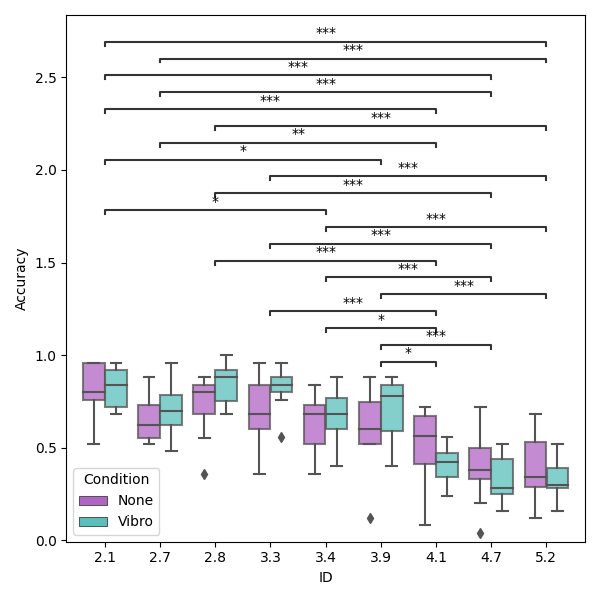

In [162]:

from statannotations.Annotator import Annotator

plt.figure(figsize=(6,6))
x = np.arange(0,9)

merged_df_str = merged_df
merged_df_str['ID'] = merged_df_str['ID'].astype(str)
molten_df['index'] = molten_df['index'].astype(str)
molten_df['variable'] = molten_df['variable'].astype(str)
molten_df = molten_df[molten_df.value <= 0.05]

my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.boxplot(x="ID", y="Performance", hue="Condition", data=merged_df_str, boxprops=dict(alpha=.75), palette=my_pal, order=order)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# plt.title('Fit of performance based on ID')
# plt.xlabel('Index of difficulty (bits)')


pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]
p_values_str = [str(x) for x in p_values]


annotator = Annotator(
    ax, pairs, data=merged_df_str, x="ID", y="Performance", order=order
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [130]:
# perform Tukey's test
tukey_cond = pairwise_tukeyhsd(endog=merged_df['Performance'],
                          groups=merged_df['Condition'],
                          alpha=0.05)

#display results
print(tukey_cond)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  None  Vibro   0.0155 0.6738 -0.057 0.0879  False
--------------------------------------------------


In [64]:
merged_df.ID = merged_df.ID.round(1)

In [54]:
# wo_df.groupby('ID').boxplot()
# merged_df.boxplot(by='ID')


In [71]:
ID_wo

array([5.19639721, 4.73696559, 4.05889369, 2.79836614, 3.25779776,
       2.12029423, 3.87446912, 3.4150375 , 2.73696559, 2.12029423,
       2.79836614, 3.25779776, 4.05889369, 4.73696559, 5.19639721,
       4.05889369, 5.19639721, 4.73696559, 2.73696559, 3.87446912,
       3.4150375 , 4.73696559, 5.19639721, 4.05889369, 2.12029423,
       3.25779776, 2.79836614, 3.4150375 , 2.73696559, 3.87446912,
       3.25779776, 2.12029423, 2.79836614, 4.05889369, 4.73696559,
       5.19639721, 2.73696559, 3.87446912, 3.4150375 , 2.79836614,
       2.12029423, 3.25779776, 4.05889369, 5.19639721, 4.73696559,
       3.4150375 , 2.73696559, 3.87446912, 2.12029423, 2.79836614,
       3.25779776, 5.19639721, 4.73696559, 4.05889369, 3.25779776,
       2.79836614, 2.12029423, 3.4150375 , 3.87446912, 2.73696559,
       4.05889369, 5.19639721, 4.73696559, 2.79836614, 2.12029423,
       3.25779776, 4.05889369, 5.19639721, 4.73696559, 3.4150375 ,
       2.73696559, 3.87446912, 3.25779776, 2.79836614, 2.12029

In [76]:
print(ID_wo_rank)

[8. 7. 6. 2. 3. 0. 5. 4. 1. 0. 2. 3. 6. 7. 8. 6. 8. 7. 1. 5. 4. 7. 8. 6.
 0. 3. 2. 4. 1. 5. 3. 0. 2. 6. 7. 8. 1. 5. 4. 2. 0. 3. 6. 8. 7. 4. 1. 5.
 0. 2. 3. 8. 7. 6. 3. 2. 0. 4. 5. 1. 6. 8. 7. 2. 0. 3. 6. 8. 7. 4. 1. 5.
 3. 2. 0. 8. 7. 6. 4. 1. 5.]


In [79]:
np.unique(ID_wo)
ID_concat = np.concatenate((ID_wo, ID_haptics))
ID_rank = np.empty(np.shape(ID_concat))

for idx, unique in enumerate(np.unique(ID_concat)):
    indexes = np.argwhere(ID_concat == unique)
    ID_rank[indexes] = idx


In [122]:
np.unique(ID_wo)

array([2.12029423, 2.73696559, 2.79836614, 3.25779776, 3.4150375 ,
       3.87446912, 4.05889369, 4.73696559, 5.19639721])

In [120]:
np.unique(ID_wo)
avg_performance_wo = np.empty(np.shape(np.unique(ID_wo)))
avg_performance_haptics = np.empty(np.shape(np.unique(ID_haptics)))

for idx, unique in enumerate(np.unique(ID_wo)):
    indexes_wo = np.argwhere(ID_wo == unique)
    indexes_haptics = np.argwhere(ID_haptics == unique)

    avg_performance_wo[idx] = np.mean(performance_wo[indexes_wo])
    avg_performance_haptics[idx] = np.mean(performance_haptics[indexes_haptics])

In [121]:
avg_performance_wo
avg_performance_haptics

array([0.82666667, 0.70282609, 0.83      , 0.83111111, 0.665     ,
       0.71      , 0.40933333, 0.328     , 0.32      ])

In [80]:
print(ID_rank)

[8. 7. 6. 2. 3. 0. 5. 4. 1. 0. 2. 3. 6. 7. 8. 6. 8. 7. 1. 5. 4. 7. 8. 6.
 0. 3. 2. 4. 1. 5. 3. 0. 2. 6. 7. 8. 1. 5. 4. 2. 0. 3. 6. 8. 7. 4. 1. 5.
 0. 2. 3. 8. 7. 6. 3. 2. 0. 4. 5. 1. 6. 8. 7. 2. 0. 3. 6. 8. 7. 4. 1. 5.
 3. 2. 0. 8. 7. 6. 4. 1. 5. 8. 6. 7. 3. 2. 0. 1. 5. 4. 2. 3. 0. 8. 7. 6.
 6. 8. 7. 4. 5. 1. 6. 7. 8. 0. 3. 2. 4. 1. 5. 2. 0. 3. 7. 8. 6. 5. 1. 4.
 2. 3. 0. 6. 7. 8. 4. 1. 5. 2. 3. 0. 7. 8. 6. 0. 3. 2. 4. 1. 5. 6. 7. 8.
 3. 2. 0. 8. 6. 7. 5. 1. 4. 3. 2. 0. 6. 7. 8. 4. 5. 1.]


In [73]:
order = ID_wo.argsort()
print(order)
ranks = order.argsort()
print(ranks)

[40 31 56 24  9 64 74 48  5  8 46 59 79 70 36 28 18  3 49 73 39 10 32 55
 63 26 30 50 54 65 72 11  4 41 25 38 45 57 20 69  7 78 27 71 47 58 80 19
 37  6 29 42 15 77 53 33 23 66 12 60  2 68 17 21 62 76 34 52  1 44 13 75
 43 67 16 61 22 51 35 14  0]
[80 68 60 17 32  8 49 40  9  4 21 31 58 70 79 52 74 62 16 47 38 63 76 56
  3 34 25 42 15 50 26  1 22 55 66 78 14 48 35 20  0 33 51 72 69 36 10 44
  7 18 27 77 67 54 28 23  2 37 45 11 59 75 64 24  5 29 57 73 61 39 13 43
 30 19  6 71 65 53 41 12 46]


In [51]:
import seaborn as sns


In [93]:
ID_rank_shift = np.concatenate((ID_rank[:81]-0.2, ID_rank[81:]+0.2))

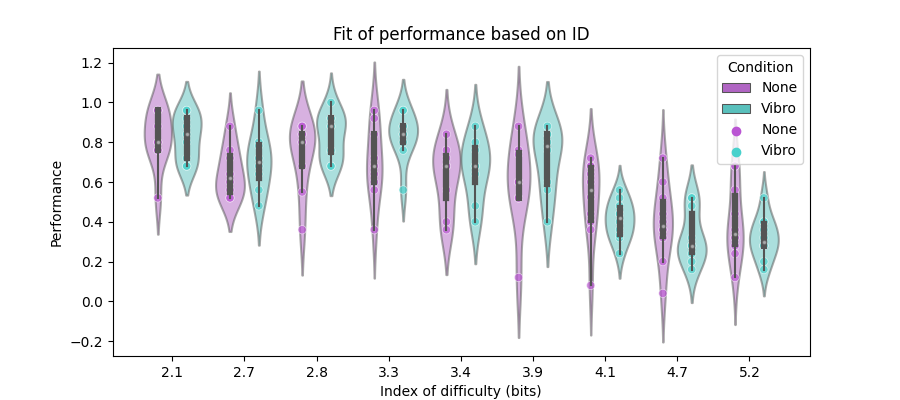

In [97]:
plt.figure(figsize=(9,4))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.ax = sns.violinplot(x="ID", y="Performance", hue="Condition", data=merged_df, alpha=0.5, palette=my_pal) 
plt.setp(ax.collections, alpha=.5)
sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')
from matplotlib.ticker import StrMethodFormatter

plt.show()

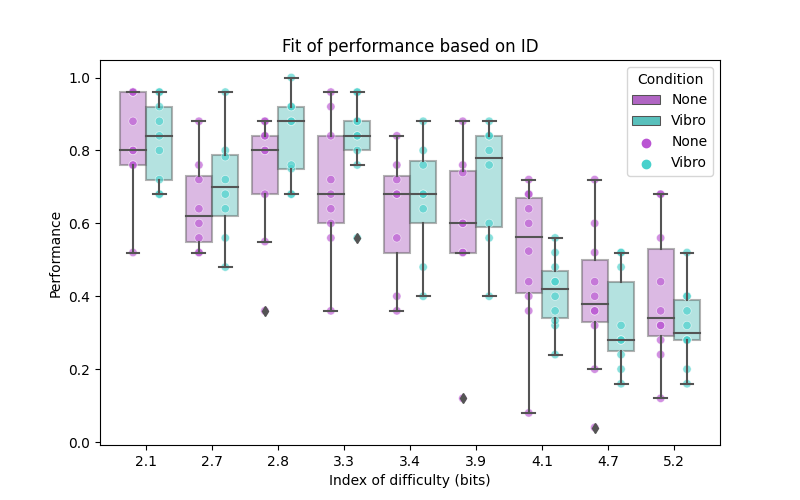

In [108]:
plt.figure(figsize=(8,5))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.boxplot(x="ID", y="Performance", hue="Condition", data=merged_df, boxprops=dict(alpha=.45), palette=my_pal)  
sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')

plt.show()

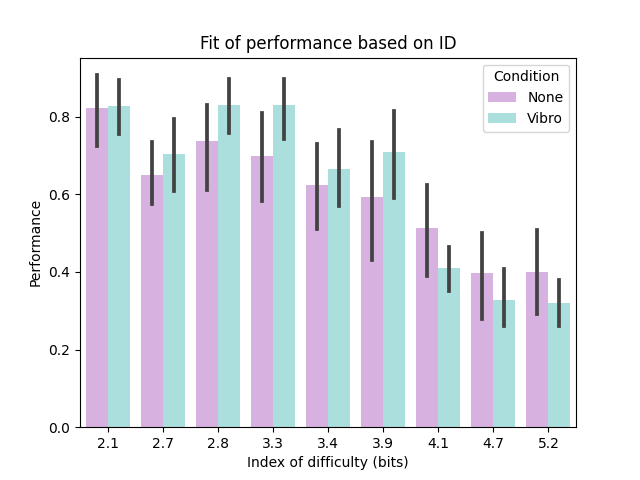

In [106]:
plt.figure()
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="ID", y="Performance", hue="Condition", data=merged_df, palette=my_pal, alpha=0.5)  
# sns.scatterplot(x = ID_rank_shift, y="Performance", hue="Condition", data=merged_df,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')

plt.show()

-0.8875003513127189
-0.962952757428075


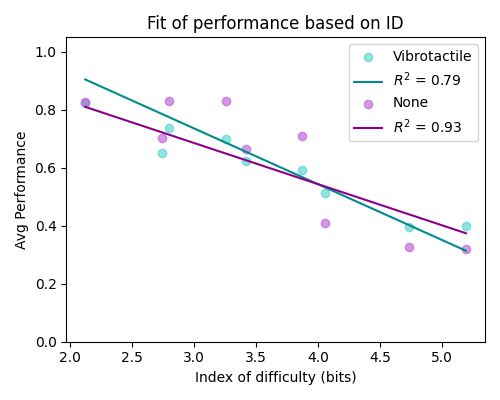

In [126]:
coef = np.polyfit(np.unique(ID_haptics),avg_performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(np.unique(ID_wo),avg_performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(np.unique(ID_wo),avg_performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(np.unique(ID_wo),avg_performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(np.unique(ID_wo), avg_performance_wo, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(np.unique(ID_wo), ID_fit_haptics(np.unique(ID_wo)), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(np.unique(ID_haptics), avg_performance_haptics, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(np.unique(ID_haptics), ID_fit_wo(np.unique(ID_haptics)), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Avg Performance')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_combined_avg.png', dpi=500, bbox_inches="tight")
plt.show()

-0.7724323505630805
-0.6138165450841493


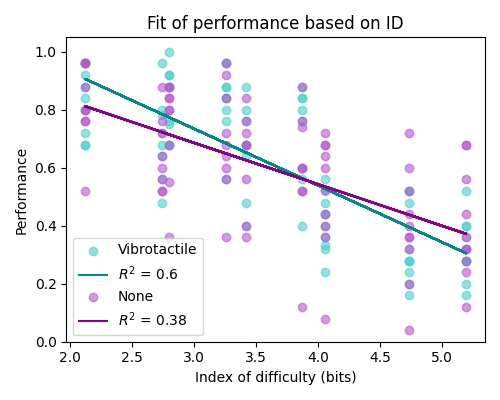

In [127]:
coef = np.polyfit(ID_haptics,performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of performance based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Performance')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_combined_avg.png', dpi=500, bbox_inches="tight")
plt.show()

0.7724323505630802
0.6138165450841493


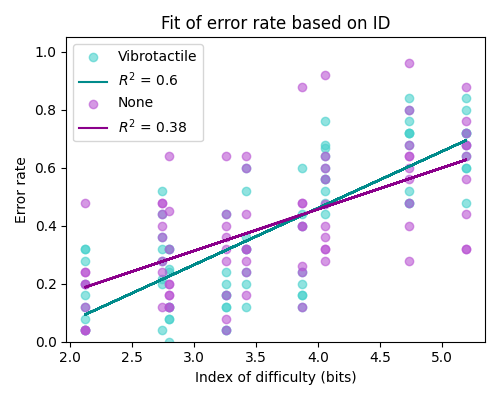

In [20]:
coef = np.polyfit(ID_haptics,1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_combined.png', dpi=500, bbox_inches="tight")
plt.show()

[6.01851852e-06 3.16851852e-01]
0.022144054984741732
[-6.66666667e-05  3.35370370e-01]
-0.2865427198555189


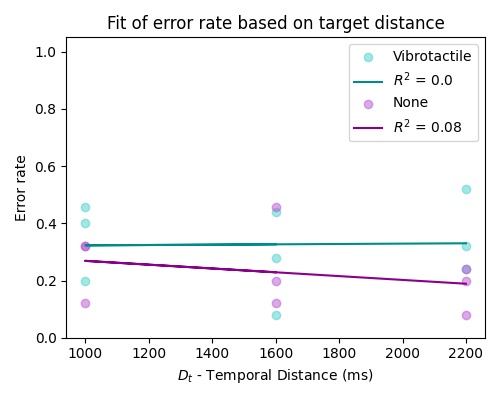

In [59]:

dt_coef_haptics = np.polyfit(gui_combos_haptics[:,1],1-performance_haptics,1)
print(dt_coef_haptics)
dt_fn_haptics = np.poly1d(dt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,1],1-performance_haptics)[2]
print(r_value_haptics)


dt_coef_wo = np.polyfit(gui_combos_wo[:,1],1-performance_wo,1)
print(dt_coef_wo)
dt_fn_wo = np.poly1d(dt_coef_wo) 
r_value_wo = stats.linregress(gui_combos_wo[:,1],1-performance_wo)[2]
print(r_value_wo) 

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,1], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, label="Vibrotactile", color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 1][0:3], dt_fn_haptics(gui_combos_haptics[:, 1][0:3]), color='darkcyan', label=label_str_haptics)


plt.scatter(gui_combos_wo[:,1], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label="None", color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 1][0:3], dt_fn_wo(gui_combos_wo[:, 1][0:3]),color='darkmagenta', label=label_string_wo)


plt.title('Fit of error rate based on target distance')
plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig('errorrate_distance.png', dpi=500, bbox_inches="tight")
plt.show()

In [60]:
widths = gui_combos_haptics[:,0]//60
# print(widths)
width_levels = np.repeat(widths, repitions)
# print(width_levels)

# box_plot_data_width = np.split(threshold_distance_timestamp, np.unique(width_levels, return_index=True)[1][1:])
# # print(box_plot_data_width)

width_split = [threshold_distance_timestamp_haptics[width_levels == i] for i in range(width_levels.max() + 1)]
width_split = width_split[1:]
# print(width_split)
# print(np.shape(width_split))

# width_split = width_split[~np.isnan(width_split)]
width_no_nan  = [list[~np.isnan(list)] for list in width_split]
print(width_no_nan)


[array([-0.04075  , -0.1061779,  0.00825  , -0.00775  , -0.012    ,
        0.00875  ,  0.0425   , -0.057536 ,  0.01425  ,  0.015    ,
       -0.0105   ,  0.0451272,  0.027    , -0.0125   ,  0.0115   ,
       -0.001    ,  0.03     ,  0.0645615, -0.0295   ,  0.04425  ,
        0.0075   ,  0.0364703, -0.034    ,  0.03275  ,  0.018    ,
       -0.0281631, -0.025    ,  0.04     ,  0.003    , -0.0045   ,
        0.004    , -0.02025  ,  0.00425  ,  0.02675  ,  0.02572  ,
       -0.02775  , -0.029    , -0.00425  ,  0.0468066,  0.0607264,
        0.0446773,  0.013    , -0.02075  ,  0.0592934, -0.0547406,
       -0.00525  , -0.079    ,  0.0275   ,  0.018    , -0.0225   ,
        0.04025  , -0.1600047, -0.0507456, -0.02875  ,  0.00175  ,
        0.01925  ,  0.03975  , -0.0282263,  0.0254843,  0.0131273,
       -0.044    ,  0.0394852,  0.0488983,  0.0185   , -0.05375  ,
       -0.0671242,  0.00325  ,  0.0425   , -0.0407184,  0.02675  ,
        0.03025  ,  0.0656482, -0.0137946, -0.01425  ,  0.029

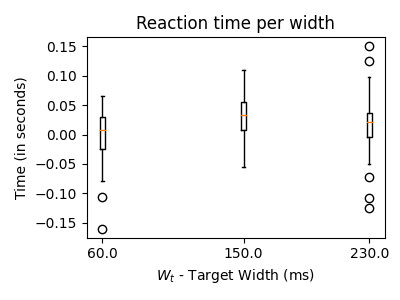

In [61]:

fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.set_title('')
ax1.boxplot(width_no_nan, positions=np.unique(gui_combos_haptics[:,0]), widths=3)
plt.title('Reaction time per width')
plt.ylabel('Time (in seconds)')
plt.xlabel('$W_{t}$ - Target Width (ms)')
plt.xlim([50, 240])
plt.tight_layout()
from matplotlib.ticker import FormatStrFormatter
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

Vibro mean: [ 0.02206921  0.00189954  0.03213421  0.03152107  0.02298428  0.03263458
  0.0037678   0.0021028  -0.00228882]
Vibro std: [0.03396871 0.03753536 0.05423115 0.03645048 0.04174855 0.02657974
 0.03659147 0.03419279 0.04831215]
None mean: [0.01953267 0.0128406  0.04920995 0.06076418 0.05016262 0.05798655
 0.01367936 0.0311614  0.00773007]
None std: [0.04220235 0.04659955 0.04004138 0.04640525 0.04663481 0.0436635
 0.02662067 0.03165969 0.03843917]


C:\Users\Nikole Chetty\AppData\Local\Temp\ipykernel_17752\3539459102.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,3))


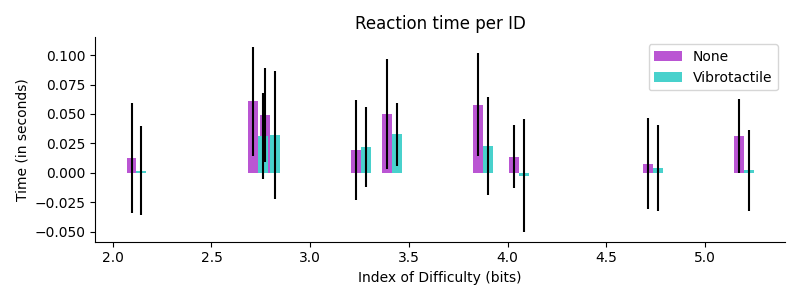

In [62]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
bar_mean_haptics = np.nanmean(box_plot_data_haptics, axis=1)
print('Vibro mean:', bar_mean_haptics)
bar_std_haptics = np.nanstd(box_plot_data_haptics, axis=1)
print('Vibro std:', bar_std_haptics)

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
bar_mean_wo = np.nanmean(box_plot_data_wo, axis=1)
print('None mean:', bar_mean_wo)
bar_std_wo = np.nanstd(box_plot_data_wo, axis=1)
print('None std:', bar_std_wo)

plt.figure(figsize=(8,3))
ax = plt.subplot(111)
w = 0.05
x= np.arange(np.shape(bar_mean_wo)[0])
ax.bar(ID_wo-w/2, bar_mean_wo, yerr=bar_std_wo, width=w, color='mediumorchid', align='center', label='None')
ax.bar(ID_haptics+w/2, bar_mean_haptics,yerr=bar_std_haptics, width=w, color='mediumturquoise', align='center', label='Vibrotactile')
plt.legend()
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('reactiontime_ID.png', dpi=500, bbox_inches="tight")
plt.show()

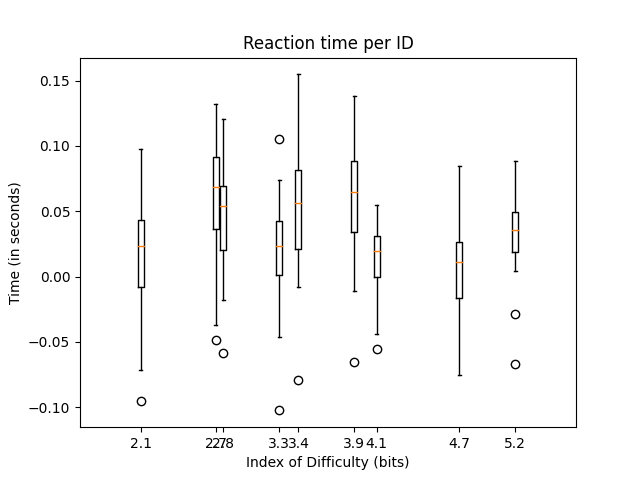

In [63]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
# print(box_plot_data)
box_plot_data_no_nan_haptics  = [list[~np.isnan(list)] for list in box_plot_data_haptics]

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
# print(box_plot_data)
box_plot_data_no_nan_wo  = [list[~np.isnan(list)] for list in box_plot_data_wo]

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(box_plot_data_no_nan_wo, positions=ID_wo.round(3), widths=0.05)
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
from matplotlib.ticker import FormatStrFormatter
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))



In [64]:
# # Exclude the first pulse - that is ardunio power cycling
# start_cue = start_cue[1:] # [1:]
# stop_cue = stop_cue[1:] #[1:]

# threshold_closest = np.empty(np.size(start_cue[:]))
# threshold_closest[:] = np.nan
# correct = np.empty(np.size(start_cue[:]))
# ###for every value in the strt_cue 
# for idx_cue, cue in enumerate(start_cue[:]):

#     after_start = start_cue[idx_cue] <= threshold_crossings_up
#     before_stop = threshold_crossings_up <= stop_cue[idx_cue]
#     # check if there is a value between start_cue and stop cue
#     if np.any(np.logical_and(after_start, before_stop)):
#         in_target = np.argwhere(np.logical_and(after_start, before_stop))
#         closet_value = in_target[0]
#         threshold_closest[idx_cue] = threshold_crossings_up[in_target[0]]
#         correct[idx_cue] = True
#     else:
#         # if not - get closet 
#         idx = (np.abs(threshold_crossings_up - start_cue[idx_cue])).argmin()

#         threshold_closest[idx_cue] = threshold_crossings_up[idx]
#         correct[idx_cue] = False
#          # get rid of values greater than half the distance between the next cue 

# print("closest:", threshold_closest)
# print("correctness:", correct)

# threshold_distance = threshold_closest - start_cue
# print("distance away:", threshold_distance)


# threshold_distance[threshold_distance > 4000] = NaN
# threshold_distance[threshold_distance < -4000] = NaN
# print("distance away:", threshold_distance)

In [65]:
# plt.figure()
# plt.hist(threshold_distance/4000, bins=15)
# plt.title('Time of "click" from cue onset (all levels)')
# plt.xlabel('Time (in seconds)')
# plt.ylabel('Occurances')
# plt.show()

In [66]:
# rt = threshold_distance/4000
# print(rt)
# rt = rt[~np.isnan(rt)]
# print(rt)

In [67]:
# rt_normalized = (rt - np.mean(rt))/np.std(rt)
# stats.kstest(rt_normalized, stats.norm.cdf)
# # if p val is greater than 0.05 -> GAUSSIAN

In [68]:


# np.random.seed(0)

# mu = np.mean(rt)
# sigma = np.std(rt)
# n_bins = 50

# fig, ax = plt.subplots(figsize=(8, 4))

# # plot the cumulative histogram
# n, bins, patches = ax.hist(rt, n_bins, density=1, histtype='step',
#                            cumulative=True, label='Empirical')

# # Add a line showing the expected distribution.
# y = stats.norm.pdf(bins, mu, sigma).cumsum()
# y /= y[-1]

# ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')



# # tidy up the figure
# ax.grid(True)
# ax.legend(loc='right')
# ax.set_title('Cumulative step histograms')
# ax.set_xlabel('Reaction time (sec)')
# ax.set_ylabel('Likelihood of occurrence')

# plt.show()

In [69]:
# repitions = gui_data['reps'] 
# print("repitions:", repitions)
# level = np.arange(len(correct))//repitions
# print('Levels:', level)
# performance = np.bincount(level,correct)/np.bincount(level)
# print('performance per level:', performance)


In [70]:


# box_plot_data = np.split(threshold_distance/4000, np.unique(level, return_index=True)[1][1:])
# print(box_plot_data)

In [71]:
# for idx, data in enumerate(box_plot_data):
#     box_plot_data[idx] = data[~np.isnan(data)]



In [72]:
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(box_plot_data[0:np.shape(ID)[0]], positions=ID.round(3), widths=0.05)
# plt.title('Reaction time per ID')
# plt.ylabel('Time (in seconds)')
# plt.xlabel('Index of Difficulty (bits)')
# from matplotlib.ticker import FormatStrFormatter
# ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

In [73]:
# plt.figure(figsize=(5,3))
# plt.scatter(ID, 1-performance[0:np.shape(ID)[0]])
# plt.title('Fit of error rate based on ID')
# plt.xlabel('Index of difficulty (bits)')
# plt.ylabel('Error rate')
# plt.show()
# # plt.xlim([0, 4])
# plt.ylim([0, 1.05])
# plt.tight_layout()

In [74]:
# plt.figure(figsize=(5,3))
# plt.scatter(gui_data['combos'][:,0], 1-performance[0:np.shape(ID)[0]])
# plt.title('Fit of error rate based on target width')
# plt.xlabel('$W_{t}$ - Target Width (ms)')
# plt.ylabel('Error rate')
# plt.ylim([0, 1.05])
# plt.tight_layout()
# plt.show()


In [75]:
# plt.figure(figsize=(5,3))
# plt.scatter(gui_data['combos'][:,1], 1-performance[0:np.shape(ID)[0]])
# plt.title('Fit of error rate based on target distance')
# plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
# plt.ylabel('Error rate')
# plt.ylim([0, 1.05])
# plt.tight_layout()
# plt.show()